## **Working with Images**

In this project, I'll use PyTorch and linear regression to solve a very different kind of problem: *image classification*. I'll use the famous [*MNIST Handwritten Digits Database*](http://yann.lecun.com/exdb/mnist/) as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
# Download training dataset
dataset = MNIST(root='/content/drive/MyDrive/DataSets/MNIST', download=True)

In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='/content/drive/MyDrive/DataSets/MNIST', train=False)
len(test_dataset)

10000

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


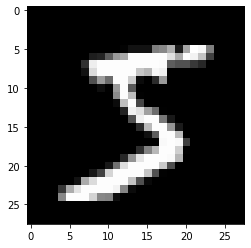

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


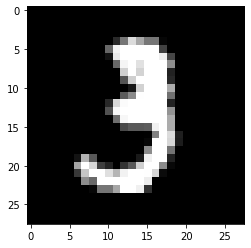

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='/content/drive/MyDrive/DataSets/MNIST', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


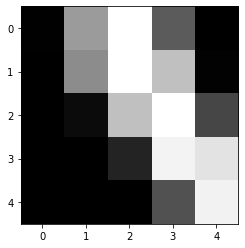

In [13]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

## **Training and Validation Datasets**

Splitting the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

Setting aside 10,000 randomly chosen images for validation using the `random_spilt` method from PyTorch.

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## **Model**

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)  # 10 outputs and 784 inputs
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0328,  0.0143, -0.0113,  ..., -0.0063, -0.0056, -0.0288],
        [-0.0234,  0.0266,  0.0165,  ...,  0.0001,  0.0017, -0.0015],
        [ 0.0119, -0.0055, -0.0328,  ...,  0.0204, -0.0007, -0.0184],
        ...,
        [ 0.0106,  0.0275,  0.0075,  ...,  0.0097,  0.0226, -0.0309],
        [-0.0353, -0.0355,  0.0278,  ..., -0.0347,  0.0260, -0.0242],
        [ 0.0105, -0.0343,  0.0255,  ...,  0.0306, -0.0119,  0.0255]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0184, -0.0167, -0.0336,  0.0016,  0.0049,  0.0282, -0.0133, -0.0346,
        -0.0194, -0.0134], requires_grad=True)

In [23]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 6, 1, 1, 0, 5, 6, 0, 1, 0, 9, 6, 1, 6, 3, 5, 4, 3, 6, 0, 5, 1, 5, 4,
        4, 9, 6, 3, 3, 9, 2, 0, 2, 2, 1, 6, 6, 4, 1, 8, 7, 5, 9, 1, 5, 1, 4, 5,
        0, 6, 1, 4, 4, 7, 7, 1, 7, 4, 3, 4, 6, 1, 3, 2, 3, 4, 4, 3, 3, 9, 0, 4,
        3, 3, 3, 1, 8, 5, 3, 2, 4, 1, 6, 6, 7, 7, 3, 1, 3, 9, 0, 7, 9, 2, 8, 1,
        5, 1, 7, 0, 6, 4, 7, 0, 4, 0, 0, 6, 6, 5, 4, 5, 9, 5, 0, 4, 4, 1, 2, 8,
        6, 8, 9, 9, 8, 7, 0, 8])
torch.Size([128, 1, 28, 28])
tensor([[ 0.0290,  0.0817,  0.1756,  ..., -0.1290,  0.3564, -0.0265],
        [-0.0253,  0.0205, -0.1870,  ..., -0.1982, -0.0289, -0.1008],
        [-0.1917,  0.1727, -0.0069,  ...,  0.0616, -0.0908, -0.1081],
        ...,
        [-0.1950,  0.0768,  0.1947,  ...,  0.0430,  0.0320,  0.0481],
        [ 0.2003,  0.2027, -0.3088,  ...,  0.1140,  0.2009, -0.0030],
        [-0.0460,  0.1412,  0.2545,  ..., -0.2662,  0.2272,  0.2499]],
       grad_fn=<AddmmBackward0>)


In [27]:
images.shape

torch.Size([128, 1, 28, 28])

In [28]:
images.reshape(128, 784).shape  # reshaping because nn.Linear accepts the tensor of 2 dimensions.Now we will have 128 vectors. and 784 inputs for a particular sample.

torch.Size([128, 784])

In [29]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()    # Calling the constructor of the super class ie; the class we wre extending(nn.Module class)
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)  #128*784. -1 means pytorch will itself figure out other dimension
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [30]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [31]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0203, -0.0028,  0.0108,  ...,  0.0006,  0.0002,  0.0249],
         [-0.0333, -0.0300,  0.0098,  ...,  0.0050,  0.0290, -0.0272],
         [-0.0152,  0.0253,  0.0355,  ..., -0.0055,  0.0069,  0.0098],
         ...,
         [-0.0034,  0.0196, -0.0044,  ...,  0.0025, -0.0037, -0.0051],
         [-0.0118,  0.0219,  0.0267,  ...,  0.0028, -0.0332, -0.0260],
         [-0.0119, -0.0125, -0.0062,  ..., -0.0187,  0.0161, -0.0151]],
        requires_grad=True), Parameter containing:
 tensor([-0.0146,  0.0247,  0.0313, -0.0135,  0.0205, -0.0019, -0.0205,  0.0052,
         -0.0222,  0.0061], requires_grad=True)]

In [32]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.2722, -0.0454, -0.1917, -0.1637,  0.4243,  0.1241,  0.0793,  0.1300,
         -0.1561,  0.0778],
        [-0.4984, -0.1031, -0.0714, -0.0029,  0.0855,  0.0887, -0.2309, -0.1920,
          0.0162,  0.0794]])


For each of the 128 input images, we get 10 outputs, one for each class.

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)


![](https://www.montereyinstitute.org/courses/DevelopmentalMath/COURSE_TEXT2_RESOURCE/U18_L1_T1_text_final_6_files/image001.png)



It will  first make all the elements positive and then divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

In [33]:
import torch.nn.functional as F

In [34]:
outputs[:2]

tensor([[-0.2722, -0.0454, -0.1917, -0.1637,  0.4243,  0.1241,  0.0793,  0.1300,
         -0.1561,  0.0778],
        [-0.4984, -0.1031, -0.0714, -0.0029,  0.0855,  0.0887, -0.2309, -0.1920,
          0.0162,  0.0794]], grad_fn=<SliceBackward0>)

In [35]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0746, 0.0936, 0.0809, 0.0831, 0.1497, 0.1109, 0.1060, 0.1115, 0.0838,
         0.1059],
        [0.0651, 0.0966, 0.0997, 0.1068, 0.1166, 0.1170, 0.0850, 0.0884, 0.1088,
         0.1159]])
Sum:  0.9999999403953552


In [36]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 5, 2, 4, 3, 4, 4, 3, 9, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 7,
        8, 4, 7, 4, 9, 4, 4, 4, 4, 3, 5, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 9, 7, 8,
        1, 4, 7, 4, 8, 4, 7, 1, 4, 9, 4, 3, 9, 9, 4, 3, 4, 5, 4, 4, 4, 8, 3, 5,
        4, 4, 5, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 7, 9, 4, 7, 4, 9, 8, 9, 4,
        4, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 9, 4, 4, 5, 7, 4, 7,
        4, 4, 8, 4, 3, 4, 4, 7])
tensor([0.1497, 0.1170, 0.1267, 0.1346, 0.1338, 0.1591, 0.1336, 0.1297, 0.1272,
        0.1405, 0.1238, 0.1236, 0.1467, 0.1324, 0.1325, 0.1379, 0.1400, 0.1214,
        0.1294, 0.1176, 0.1318, 0.1235, 0.1245, 0.1357, 0.1337, 0.1533, 0.1393,
        0.1377, 0.1383, 0.1259, 0.1543, 0.1437, 0.1485, 0.1296, 0.1175, 0.1188,
        0.1370, 0.1371, 0.1385, 0.1196, 0.1465, 0.1435, 0.1253, 0.1357, 0.1179,
        0.1106, 0.1366, 0.1373, 0.1372, 0.1344, 0.1196, 0.1216, 0.1220, 0.1355,
        0.1331, 0.1445, 0.1222, 0.1261, 0.1407, 0.1264, 0.1322, 0.1144, 0.1244,
       

In [37]:
labels

tensor([7, 6, 8, 2, 6, 7, 4, 3, 1, 8, 6, 0, 2, 4, 7, 9, 7, 2, 8, 2, 6, 1, 4, 8,
        2, 9, 6, 2, 1, 4, 5, 6, 3, 0, 8, 3, 0, 4, 9, 7, 7, 0, 5, 3, 8, 5, 1, 5,
        3, 2, 1, 4, 3, 8, 3, 8, 8, 0, 9, 0, 3, 1, 5, 5, 3, 6, 5, 7, 2, 3, 6, 2,
        4, 3, 8, 0, 7, 4, 2, 6, 0, 2, 8, 3, 4, 1, 2, 2, 5, 7, 5, 7, 1, 6, 8, 6,
        3, 0, 0, 8, 7, 4, 7, 7, 0, 1, 8, 5, 2, 2, 4, 7, 9, 1, 3, 0, 6, 5, 7, 8,
        3, 0, 4, 5, 0, 6, 8, 1])

## **Evaluation Metric and Loss Function**

In [38]:
outputs[:2]

tensor([[-0.2722, -0.0454, -0.1917, -0.1637,  0.4243,  0.1241,  0.0793,  0.1300,
         -0.1561,  0.0778],
        [-0.4984, -0.1031, -0.0714, -0.0029,  0.0855,  0.0887, -0.2309, -0.1920,
          0.0162,  0.0794]], grad_fn=<SliceBackward0>)

In [ ]:
# How many of 128 labels were predicted correctly.
torch.sum(preds == labels) 

In [39]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
accuracy(outputs, labels)

tensor(0.1016)

In [41]:
probs

tensor([[0.0746, 0.0936, 0.0809,  ..., 0.1115, 0.0838, 0.1059],
        [0.0651, 0.0966, 0.0997,  ..., 0.0884, 0.1088, 0.1159],
        [0.0772, 0.1065, 0.1267,  ..., 0.1056, 0.0953, 0.1080],
        ...,
        [0.0614, 0.0986, 0.0641,  ..., 0.1357, 0.1020, 0.0993],
        [0.0844, 0.1134, 0.0952,  ..., 0.1081, 0.0901, 0.1206],
        [0.0700, 0.1054, 0.0789,  ..., 0.1257, 0.0997, 0.1218]],
       grad_fn=<SoftmaxBackward0>)

In [42]:
accuracy(outputs, labels)

tensor(0.1016)

Accuracy is an excellent way to evaluate the model. However, it is not used as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so the accuracy can't be used for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)


* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

In [43]:
outputs

tensor([[-0.2722, -0.0454, -0.1917,  ...,  0.1300, -0.1561,  0.0778],
        [-0.4984, -0.1031, -0.0714,  ..., -0.1920,  0.0162,  0.0794],
        [-0.1996,  0.1227,  0.2959,  ...,  0.1137,  0.0118,  0.1361],
        ...,
        [-0.4832, -0.0098, -0.4397,  ...,  0.3096,  0.0243, -0.0020],
        [-0.2207,  0.0755, -0.1000,  ...,  0.0275, -0.1544,  0.1366],
        [-0.3774,  0.0323, -0.2566,  ...,  0.2084, -0.0229,  0.1773]],
       grad_fn=<AddmmBackward0>)

In [44]:
loss_fn = F.cross_entropy

In [45]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3175, grad_fn=<NllLossBackward0>)


## Training the model

The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch.


for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection



In [46]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):  # This function is for training process
    optimizer = opt_func(model.parameters(), lr)   #Passing list of parameters of the model. It is going to grab weights and bias metrices of all those layers and 
    #put them in a list.
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()    # to compute gradients
            optimizer.step()   # change the weights using the gradients
            optimizer.zero_grad()  # set the gradients back to zero
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

The `fit` function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time.

In [47]:
def evaluate(model, val_loader):      # This function performs the validation step
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [48]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}    # overall loss and accuracy for entire validation dataset
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

### training a model to calculate accuracy.

In [49]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9410, val_acc: 0.6265
Epoch [1], val_loss: 1.6729, val_acc: 0.7269
Epoch [2], val_loss: 1.4721, val_acc: 0.7637
Epoch [3], val_loss: 1.3203, val_acc: 0.7868
Epoch [4], val_loss: 1.2035, val_acc: 0.8013


With just 5 epochs of training, the model has reached an accuracy of around 80% on the validation set.

In [50]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1116, val_acc: 0.8111
Epoch [1], val_loss: 1.0377, val_acc: 0.8171
Epoch [2], val_loss: 0.9772, val_acc: 0.8230
Epoch [3], val_loss: 0.9268, val_acc: 0.8279
Epoch [4], val_loss: 0.8843, val_acc: 0.8312


In [51]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8477, val_acc: 0.8348
Epoch [1], val_loss: 0.8161, val_acc: 0.8379
Epoch [2], val_loss: 0.7883, val_acc: 0.8410
Epoch [3], val_loss: 0.7638, val_acc: 0.8426
Epoch [4], val_loss: 0.7419, val_acc: 0.8452


In [52]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7224, val_acc: 0.8473
Epoch [1], val_loss: 0.7047, val_acc: 0.8492
Epoch [2], val_loss: 0.6887, val_acc: 0.8511
Epoch [3], val_loss: 0.6740, val_acc: 0.8530
Epoch [4], val_loss: 0.6605, val_acc: 0.8548


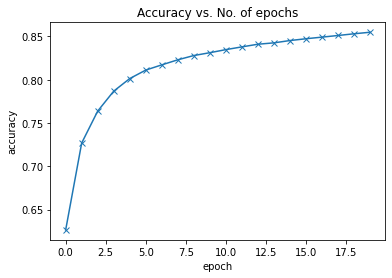

In [53]:
history = history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above graph that the model probably won't cross the accuracy threshold of 85% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss.
